In [1]:
#PREAMBLE

import matplotlib.pyplot as plt
from scipy import optimize,  interpolate, integrate
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
#%matplotlib notebook

In [2]:
#tex PREAMBLE

from matplotlib import rc
#******************************************************

rc('font',**{'family':'serif','serif':['Times']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#*******************************************************

# Usar SEABORN para graficar

In [3]:
sns.set()

# Leer archivos con PANDAS y almacenar

In [4]:
f=pd.read_csv('./tarea3/file_f.csv', header=0, usecols=(1,2))
g=pd.read_csv('./tarea3/file_g.csv', header=0, usecols=(1,2))

In [5]:
g.head(6)

,x,y
0,-2.000000,43.800852
1,-1.939394,42.049952
2,-1.878788,38.473135
3,-1.818182,36.070861
4,-1.757576,34.152866
5,-1.696970,31.354811


# Graficar archivos

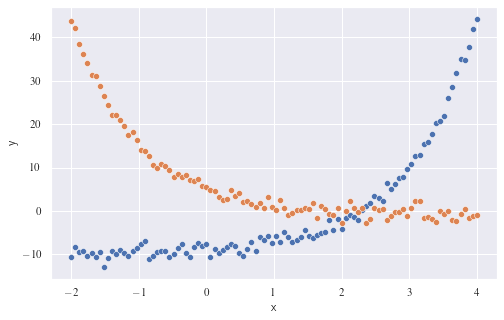

In [6]:
fig, a = plt.subplots(figsize = (8,5) #,dpi=100"
                     )
a=sns.scatterplot(data=f, x='x', y='y')
a=sns.scatterplot(data=g, x='x', y='y')

## Extra: con Matplotlib

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(f['x'],f['y'],'.',label=r'Dataset F')
ax1.plot(g['x'],g['y'],'+',label=r'Dataset G')

ax1.set_xlabel(r'$x$',fontsize=10)
ax1.set_ylabel(r'$y$',fontsize=10,rotation=0,labelpad=20)
#--------------------------------------------------------------------------------------
ax1.legend(loc='best', fancybox=True, framealpha=1, fontsize=13)
ax1.grid(which='both',ls=":", c='black', alpha=0.4);
#--------------------------------------------------------------------------------------
#plt.savefig('{0}.pdf'.format(nombre))

# Sumar componentes y's y graficar

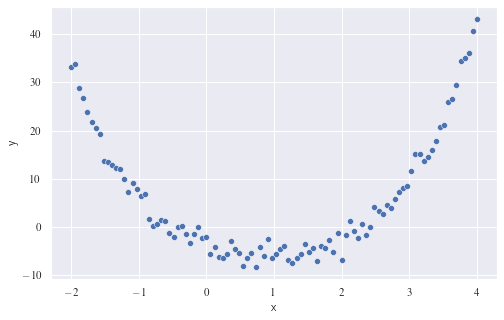

In [7]:
#f=pd.read_csv('./tarea3/file_f.csv', header=0, usecols=(1,2))
#g=pd.read_csv('./tarea3/file_g.csv', header=0, usecols=(1,2))

#armando un dataframe con la suma de las entradas en Y
suma=f['y']+g['y']
datos2=[f['x'],suma]
headers = ["x", "y"]
dfsuma = pd.concat(datos2, axis=1, keys=headers)

fig, a = plt.subplots(figsize = (8,5)#, dpi = 100
                     )
a=sns.scatterplot(data=dfsuma, x='x', y='y')

## Extra: con Matplotlib

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5)#,dpi=100
                       )

ax1.plot(f['x'],f['y']+g['y'],'.',label=r'F+G')

ax1.set_xlabel(r'$x$',fontsize=20)
ax1.set_ylabel(r'$y$',fontsize=20,rotation=0,labelpad=20)
#--------------------------------------------------------------------------------------
ax1.legend(loc='best', fancybox=True, framealpha=1, fontsize=13)
ax1.grid(which='both',ls=":", c='black', alpha=0.4);
#--------------------------------------------------------------------------------------
#plt.savefig('{0}.pdf'.format(nombre))


## Ajustar una funcion cuadratica y encontrar coeficientes

In [8]:
#USAMOS MEJOR SCIPY.OPTIMIZE.CURVE_FIT, abajo

#Primero encontremos los valores de los coeficientes a,b y c para nuestro conjunto de datos dfsuma (la suma en Y)

#quadratic_coeff=np.polyfit(dfsuma['x'],dfsuma['y'],2)
#la funcion polyfit de numpy encuentra un ajuste polinomial de grado p para un conjunto de datos x,y.
#sintaxis: np.polyfit(x,y,p)
#quadratic_coeff

In [19]:
## Ahora definamos una función que nos calcule la función cuadrática, dados los coeficientes a, b y c; sobre un
## parámetro t.
quadfunct = lambda t,a,b,c: (a*(t**2)) + (b*t) + c

In [20]:
#matriz de covarianza
coeff, cov = optimize.curve_fit(quadfunct,f['x'],dfsuma['y'],)
print('los coeficientes son',coeff)
print('la matriz de covarianza es \n',cov)

los coeficientes son [ 4.55037324 -7.95814613 -4.55137109]
la matriz de covarianza es 
 [[ 0.00885751 -0.01771503 -0.01825184]
 [-0.01771503  0.05711103  0.01482271]
 [-0.01825184  0.01482271  0.12564777]]


## Graficar coeficientes y matriz de covarianza

<AxesSubplot:>

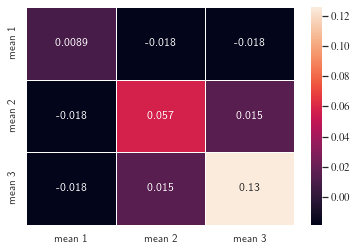

In [57]:
#corr = dataframe.corr()
cov=pd.DataFrame(cov)
cov.columns=["mean 1", "mean 2", "mean 3"]
sns.heatmap(cov, 
            xticklabels=cov.columns.values,
            yticklabels=cov.columns.values,
            annot=True, linewidths=.5)

In [53]:
datos2=[f['x'],suma]
headers = ["mean 1", "mean 2", "mean 3"]
dfsuma = pd.concat(datos2, axis=1, keys=headers)

,0,1,2
0,0.008858,-0.017715,-0.018252
1,-0.017715,0.057111,0.014823
2,-0.018252,0.014823,0.125648


## Graficar mejor ajuste de la cuadratica

In [155]:
quad=quadfunct(f['x'],coeff[0],coeff[1],coeff[2])
#calculamos la función cuadrática

In [156]:
#armando un dataframe con el ajuste
datos3=[f['x'],quad]
headers = ["x", "y"]
adjust_to_data = pd.concat(datos3, axis=1, keys=headers)
adjust_to_data

,x,y
0,-2.000000,29.566414
1,-1.939394,27.997695
2,-1.878788,26.462405
3,-1.818182,24.960542
4,-1.757576,23.492107
...,...,...
95,3.757576,29.793721
96,3.818182,31.400653
97,3.878788,33.041013
98,3.939394,34.714800


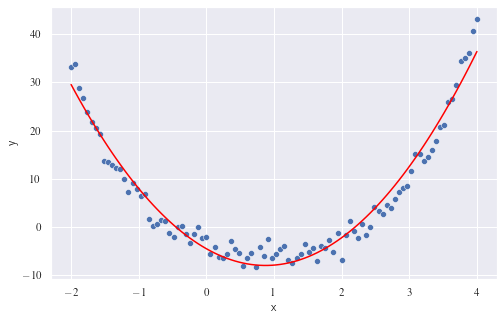

In [36]:
#graficamos los datos (azul) y su ajuste (rojo)
fig, a = plt.subplots(figsize = (8,5)#, dpi = 100
                     )
a=sns.scatterplot(data=dfsuma, x='x', y='y')
a=sns.lineplot(data=adjust_to_data, x='x',y='y', color='red')

# El mejor ajuste, convertir a una funcion (interpolar)

## a) Encontrar raices

In [37]:
quad_wcoeff = lambda t: (coeff[0]*(t**2)) + (coeff[1]*t) + coeff[2]
#definimos esta funcion cuadrática con coeficientes para evitar estar metiendo los coeficientes cada que queramos
#correrla, también para evitar errores de 'series' al calcular raíces y el mínimo

root1=optimize.root_scalar(quad_wcoeff,bracket=[1,4])
root2=optimize.root_scalar(quad_wcoeff,bracket=[-2,1])
print(root1,"\n", root2)

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 2.2029383531366866 
       converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -0.45403871091014236


In [38]:
root1=2.2029383531366866 
root2=-0.45403871091014236

## b) Encontrar minimo

In [39]:
minimum=optimize.minimize_scalar(quad_wcoeff)
minimum

     fun: -8.030870821319354
    nfev: 9
     nit: 5
 success: True
       x: 0.8744498081614176

## c) Calcular derivadas

In [30]:
from scipy import misc

pendiente1=misc.derivative(quad_wcoeff,root1)
pendiente2=misc.derivative(quad_wcoeff,root2)

print('en x={} la pendiente es {}'.format(root1,pendiente1))
print('en x={} la pendiente es {}'.format(root2,pendiente2))

en x=2.2029383531366866 la pendiente es 12.090237330219965
en x=-0.45403871091014236 la pendiente es -12.090237330220017


In [31]:
y1 = lambda x: pendiente1*(x-root1)+(quad_wcoeff(root1))
y2 = lambda x: pendiente2*(x-root2)+(quad_wcoeff(root2))

In [113]:
y1x=y1(f['x'])
y2x=y2(f['x'])
y1(f['x'])

0    -50.814522
1    -50.081781
2    -49.349039
3    -48.616297
4    -47.883556
        ...    
95    18.795935
96    19.528677
97    20.261418
98    20.994160
99    21.726902
Name: x, Length: 100, dtype: float64

In [114]:
#convirtiendo las ecuaciones de tangente en dataframes 
datos=[f['x'],y1x]
headers = ["x", "y"]
tan1 = pd.concat(datos, axis=1, keys=headers)

datos=[f['x'],y2x]
headers = ["x", "y"]
tan2 = pd.concat(datos, axis=1, keys=headers)

# Graficar tangentes a raices y funcion 

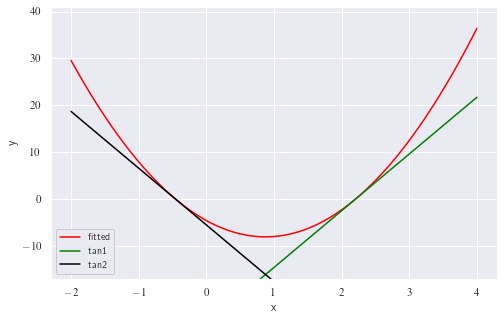

In [59]:
fig, a = plt.subplots(figsize = (8,5)#, dpi = 100
                     )
a=sns.lineplot(data=adjust_to_data, x='x',y='y', color='red',label='fitted')
a=sns.lineplot(data=tan1, x='x',y='y', color='green',label='tan1')
a=sns.lineplot(data=tan2, x='x',y='y', color='black',label='tan2')
a.set_ylim(bottom=-17)
#a.set_xlim(left=-2.2,right=4.2)
a.legend(loc='lower left', fancybox=True, framealpha=1, fontsize=10)

In [ ]:
fig, a = plt.subplots(figsize = (8,5)#, dpi = 100
                     )
a=sns.lineplot(data=adjust_to_data, x='x',y='y', color='red',label='fitted')
a=sns.lineplot(data=tan1, x='x',y='y', color='green',label='tan1')
a=sns.lineplot(data=tan2, x='x',y='y', color='black',label='tan2')
a.set_ylim(bottom=-17)
#a.set_xlim(left=-2.2,right=4.2)
a.legend(loc='lower left', fancybox=True, framealpha=1, fontsize=10)

# Graficar area entre parabola y tangentes

In [103]:
#calculemos el area bajo la curva ajustada desde x=root1 hasta x(minimum)
#y luego desde x(minimum) hasta x=root2
area_fit1=integrate.quad(quad_wcoeff,root1,0.8744498081614176)
area_fit2=integrate.quad(quad_wcoeff,root2,0.8744498081614176)
#print(area_fit1[0], area_fit2[0])

area_tan1=integrate.quad(y1,root1,0.8744498081614176)
area_tan2=integrate.quad(y2,root2,0.8744498081614176)

#...y restamos (las entradas 0 pues integrate.quad da dos resultados, el area y el error)
a_tot1=area_tan1[0]-area_fit1[0]
a_tot2=area_fit2[0]-area_tan2[0]

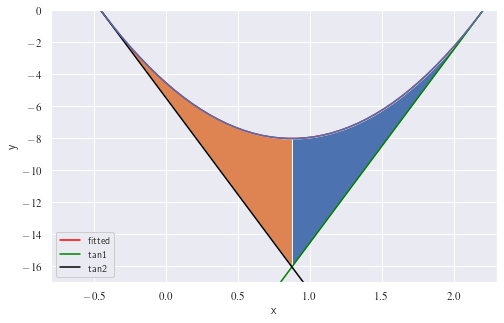

In [166]:
fig, a = plt.subplots(figsize = (8,5)#, dpi = 100
                     )
a=sns.lineplot(data=adjust_to_data, x='x',y='y', color='red',label='fitted')
a=sns.lineplot(data=tan1, x='x',y='y', color='green',label='tan1')
a=sns.lineplot(data=tan2, x='x',y='y', color='black',label='tan2')

a.plot(f['x'],quad_wcoeff(f['x']))
a.fill_between(np.linspace(root1,0.8744498081614176),quad_wcoeff(np.linspace(root1,0.8744498081614176)),y1(np.linspace(root1,0.8744498081614176)))
a.fill_between(np.linspace(root2,0.8744498081614176),quad_wcoeff(np.linspace(root2,0.8744498081614176)),y2(np.linspace(root2,0.8744498081614176)))

a.set_ylim(bottom=-17,top=0)
a.set_xlim(left=-0.8,right=2.3)
a.legend(loc='lower left', fancybox=True, framealpha=1, fontsize=10)

# Encotrar area total 

In [100]:
print("area =", a_tot1+a_tot2) #lo mismo daría multiplicar a_tot1*2 pues el ajuste es una función simétrica en x

area = 7.112613192189448
